In [216]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the datasets
df_users = pd.read_csv('users.csv')
df_orders = pd.read_csv('orders.csv')
df_order_items = pd.read_csv('order_items.csv')

In [217]:
df_users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,2654,Alex,Jones,alexjones@example.net,13,M,Acre,504 Anderson Crossing,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2020-04-06 18:17:00 UTC
1,5193,Dale,Flores,daleflores@example.org,52,M,Acre,29558 Ricky Keys,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2019-03-30 15:50:00 UTC
2,13037,Tyler,Brown,tylerbrown@example.net,44,M,Acre,847 Miller Island Apt. 690,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2022-10-16 15:39:00 UTC
3,14843,Brandon,Kirk,brandonkirk@example.com,42,M,Acre,272 Cory Crossing Apt. 427,69980-000,NaN,Brasil,-8.065346,-72.870949,Display,2024-09-07 18:26:00 UTC
4,17911,Kelly,Moreno,kellymoreno@example.net,33,F,Acre,720 Mark Hill Suite 187,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2023-10-16 05:39:00 UTC


In [218]:
df_users.describe()


,id,age,latitude,longitude
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.001050,28.155163,24.943763
std,28867.657797,16.996704,22.147879,89.929663
min,1.000000,12.000000,-43.172483,-158.164931
25%,25000.750000,26.000000,26.054473,-50.628053
50%,50000.500000,41.000000,35.194055,4.741497
75%,75000.250000,56.000000,40.692083,116.373152
max,100000.000000,70.000000,64.865194,153.560238


In [219]:
df_users.columns

Index(['id', 'first_name', 'last_name', 'email', 'age', 'gender', 'state',
       'street_address', 'postal_code', 'city', 'country', 'latitude',
       'longitude', 'traffic_source', 'created_at'],
      dtype='object')

In [220]:
df_orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,7,6,Cancelled,F,2021-05-03 14:56:00 UTC,NaN,NaN,NaN,2
1,24,15,Cancelled,F,2022-06-24 12:45:00 UTC,NaN,NaN,NaN,2
2,31,24,Cancelled,F,2023-04-23 17:34:00 UTC,NaN,NaN,NaN,1
3,38,28,Cancelled,F,2023-09-12 10:23:00 UTC,NaN,NaN,NaN,1
4,42,31,Cancelled,F,2024-06-13 13:41:00 UTC,NaN,NaN,NaN,1


In [221]:
df_orders.columns

Index(['order_id', 'user_id', 'status', 'gender', 'created_at', 'returned_at',
       'shipped_at', 'delivered_at', 'num_of_item'],
      dtype='object')

In [222]:
df_orders.describe()

,order_id,user_id,num_of_item
count,125063.000000,125063.000000,125063.000000
mean,62532.000000,50054.178318,1.449326
std,36102.722695,28791.986600,0.804460
min,1.000000,1.000000,1.000000
25%,31266.500000,25148.000000,1.000000
50%,62532.000000,50053.000000,1.000000
75%,93797.500000,74947.500000,2.000000
max,125063.000000,100000.000000,4.000000


In [223]:
df_order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,82239,56738,45477,14235,221966,Cancelled,2023-05-22 06:39:32 UTC,NaN,NaN,NaN,0.02
1,99785,68808,55054,14235,269366,Complete,2024-10-01 05:41:40 UTC,2024-10-01 09:45:00 UTC,2024-10-05 10:51:00 UTC,NaN,0.02
2,107726,74278,59435,14235,290709,Complete,2023-11-26 02:37:00 UTC,2023-11-27 02:10:00 UTC,2023-11-29 17:31:00 UTC,NaN,0.02
3,173506,119732,95678,14235,468570,Complete,2023-12-26 18:39:01 UTC,2023-12-23 17:05:00 UTC,2023-12-24 08:59:00 UTC,NaN,0.02
4,177992,122835,98200,14235,480608,Complete,2022-04-05 04:39:33 UTC,2022-04-06 00:35:00 UTC,2022-04-10 15:55:00 UTC,NaN,0.02


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [224]:
df_order_items.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,181257.000000,181257.000000,181257.000000,181257.000000,181257.000000,181257.000000
mean,90629.000000,62520.529927,50045.042586,15275.718212,244723.540658,59.453753
std,52324.533209,36088.036220,28780.387269,8407.749324,141225.618894,66.388200
min,1.000000,1.000000,1.000000,1.000000,2.000000,0.020000
25%,45315.000000,31279.000000,25157.000000,8020.000000,122533.000000,24.700001
50%,90629.000000,62541.000000,50061.000000,15997.000000,244640.000000,39.990002
75%,135943.000000,93721.000000,74889.000000,22557.000000,367042.000000,69.900002
max,181257.000000,125063.000000,100000.000000,29120.000000,489401.000000,999.000000


In [225]:
df_order_items.columns

Index(['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price'],
      dtype='object')

PREPROCESSING

In [226]:
df_orders['status'].value_counts()

,count
status,
Shipped,37399
Complete,31489
Processing,25224
Cancelled,18484
Returned,12467


In [227]:
df_orders_merged = pd.merge(df_orders, df_order_items, on='order_id')

In [228]:
df_orders_merged.isnull().sum()

,0
order_id,0
user_id_x,0
status_x,0
gender,0
created_at_x,0
returned_at_x,163187
shipped_at_x,63128
delivered_at_x,117361
num_of_item,0
id,0


In [229]:
df_orders_merged['created_at_y'].dtypes

dtype('O')

In [230]:
df_orders_merged['created_at_x'] = pd.to_datetime(df_orders_merged['created_at_x'], format='mixed')
df_orders_merged['created_at_y'] = pd.to_datetime(df_orders_merged['created_at_y'], format='mixed')

In [231]:
df_orders_merged['created_at_x'].dtypes
df_orders_merged['created_at_y'].dtypes

datetime64[ns, UTC]

In [232]:
df_orders_merged['created_at_x'].max()


Timestamp('2024-10-03 19:25:06.483013+0000', tz='UTC')

In [233]:
df_orders_merged['created_at_x'].min()

Timestamp('2019-01-17 08:06:00+0000', tz='UTC')

In [234]:
most_recent_date = df_orders_merged['created_at_y'].max()

In [235]:
from datetime import datetime, timedelta, timezone
current_date = datetime.now(timezone.utc)+ timedelta(days=3)

In [236]:
# Calculate the date two years ago from the most recent date
two_years_ago = most_recent_date - timedelta(days=365*2)

# Filter the DataFrame to include only the last two years of data
df_last_two_years = df_orders_merged[df_orders_merged['created_at_x'] > two_years_ago]

In [237]:
df_rfm = df_last_two_years.groupby('user_id_x').agg({
    'created_at_x': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'sale_price': 'sum'
})

In [238]:
df_rfm.columns = ['R', 'F', 'M']
df_rfm = df_rfm.reset_index()

In [239]:
print("Sample of RFM data:")
print(df_rfm.head())
print("\nSummary statistics:")
print(df_rfm.describe())

print("\nMissing values:")
print(df_rfm.isnull().sum())

Sample of RFM data:
   user_id_x    R  F           M
0          1  358  4  156.990000
1          2  493  2   83.990002
2          3  396  1   59.500000
3          4  259  1   32.990002
4          7  485  1   19.900000

Summary statistics:
           user_id_x             R             F             M
count   62634.000000  62634.000000  62634.000000  62634.000000
mean    50006.542629    247.228151      2.094741    124.276141
std     28785.322668    204.329755      1.473711    129.586117
min         1.000000      4.000000      1.000000      0.020000
25%     25137.250000     68.000000      1.000000     39.222501
50%     50016.500000    195.000000      2.000000     80.445001
75%     74841.750000    394.000000      3.000000    165.989999
max    100000.000000    729.000000     13.000000   1916.670004

Missing values:
user_id_x    0
R            0
F            0
M            0
dtype: int64


In [240]:
# Normalize the RFM values
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(df_rfm[['R', 'F', 'M']])


In [241]:
rfm_normalized[:5]

array([[ 0.54212728,  1.29284147,  0.25245081],
       [ 1.20282928, -0.06428781, -0.31088562],
       [ 0.72810266, -0.74285245, -0.49987344],
       [ 0.05761248, -0.74285245, -0.70444944],
       [ 1.16367657, -0.74285245, -0.80546417]])

In [242]:
# 3. Apply PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)  # We keep all 3 components for visualization
# PCA_result = pca.fit_transform(rfm_normalized)


# # TSNE
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# TSNE_Result = tsne.fit_transform(rfm_normalized)

# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
# plt.colorbar(scatter)
# plt.title('t-SNE visualization of RFM data')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
# plt.show()

In [243]:
weights = np.array([2,1.5,1])  # Increased weight for Recency
weighted_df = rfm_normalized * weights

In [244]:
# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# eps_values = [0.1, 0.5, 1, 1.5, 2]
# min_samples_values = [5, 10, 20, 50, 100]

# best_silhouette = -1
# best_eps = None
# best_min_samples = None

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = dbscan.fit_predict(weighted_df)
#         if len(np.unique(labels)) > 1:  # Silhouette Score requires at least 2 labels
#             score = silhouette_score(weighted_df, labels)
#             if score > best_silhouette:
#                 best_silhouette = score
#                 best_eps = eps
#                 best_min_samples = min_samples

# print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}")
# dbscan = DBSCAN(eps=0.6, min_samples=6)
# dbscan_labels = dbscan.fit_predict(weighted_df)

# df_rfm['Cluster'] = dbscan_labels

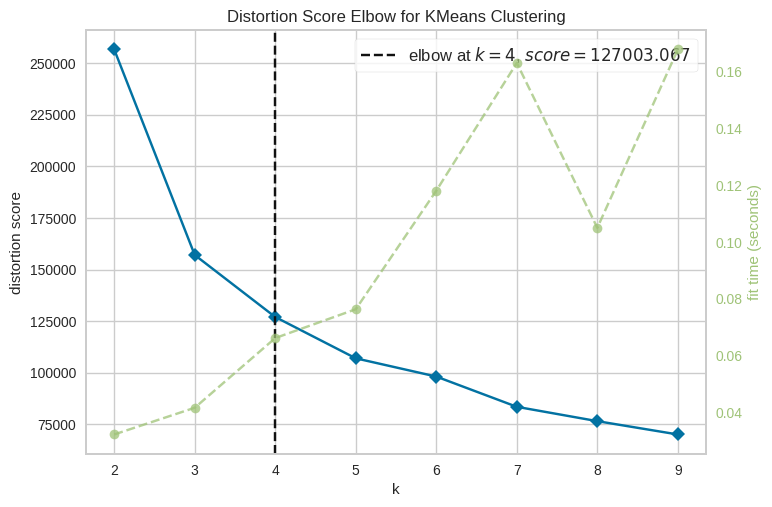

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [245]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# 3. Find optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(weighted_df)
    silhouette_avg = silhouette_score(weighted_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Visualize Elbow curve
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, max_clusters))
visualizer.fit(weighted_df)
visualizer.show()

In [246]:
# Perform K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, algorithm="elkan")
df_rfm['Cluster'] = kmeans.fit_predict(weighted_df)

In [247]:
# Analyze the clusters
cluster_analysis = df_rfm.groupby('Cluster').agg({
    'R': 'mean',
    'F': 'mean',
    'M': 'mean',
    'user_id_x': 'count'
}).round(2)

In [248]:
cluster_analysis = cluster_analysis.rename(columns={'user_id_x': 'Count'})
cluster_analysis['Percent'] = (cluster_analysis['Count'] / cluster_analysis['Count'].sum() * 100).round(2)

print("\nRFM Cluster Analysis:")
print(cluster_analysis)


RFM Cluster Analysis:
              R     F       M  Count  Percent
Cluster                                      
0        579.34  1.59   94.17  12236    19.54
1         84.11  1.37   74.72  20760    33.14
2        130.73  6.01  436.58   3702     5.91
3        121.52  3.57  205.16  10959    17.50
4        322.79  1.46   81.18  14977    23.91


In [249]:
# Calculate median values
R_median = df_rfm['R'].median()
F_median = df_rfm['F'].median()
M_median = df_rfm['M'].median()

# 5. Assign segment labels based on cluster characteristics
def assign_segment(row, R_median, F_median, M_median):
    if row['R'] < R_median and row['F'] > F_median and row['M'] > M_median:
        return 'Champions'
    elif row['R'] < R_median and (row['F'] <= F_median or row['M'] <= M_median):
        return 'Promising'
    elif row['R'] >= R_median and row['F'] > F_median and row['M'] > M_median:
        return 'Loyal'
    elif row['R'] >= R_median and row['F'] <= F_median and row['M'] <= M_median:
        return 'At Risk'
    else:
        return 'Lost'

cluster_analysis['Segment'] = cluster_analysis.apply(lambda row: assign_segment(row, R_median, F_median, M_median), axis=1)

print("RFM Cluster Analysis:")
print(cluster_analysis)

RFM Cluster Analysis:
              R     F       M  Count  Percent    Segment
Cluster                                                 
0        579.34  1.59   94.17  12236    19.54       Lost
1         84.11  1.37   74.72  20760    33.14  Promising
2        130.73  6.01  436.58   3702     5.91  Champions
3        121.52  3.57  205.16  10959    17.50  Champions
4        322.79  1.46   81.18  14977    23.91       Lost


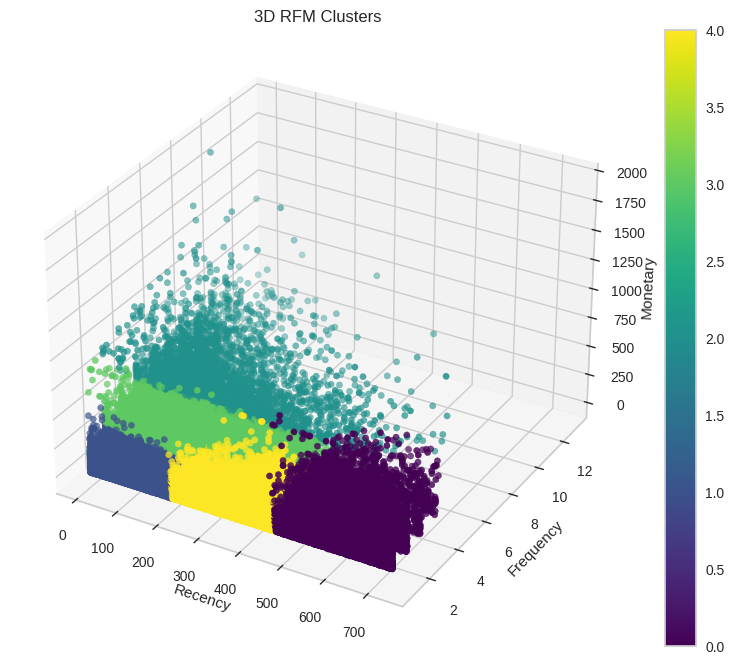

In [250]:
# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_rfm['R'], df_rfm['F'], df_rfm['M'],
                     c=df_rfm['Cluster'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D RFM Clusters')
plt.colorbar(scatter)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


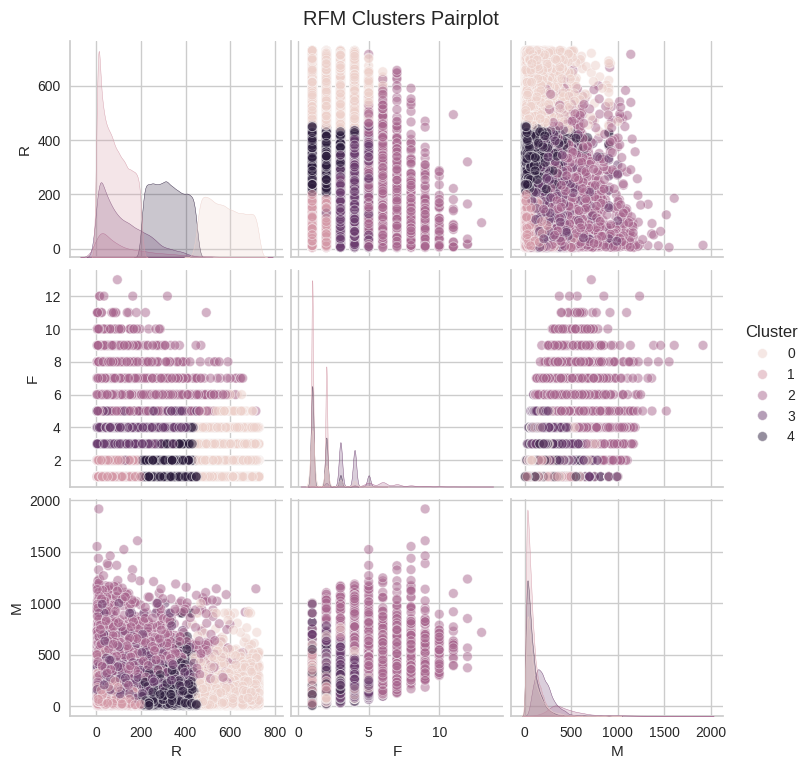

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


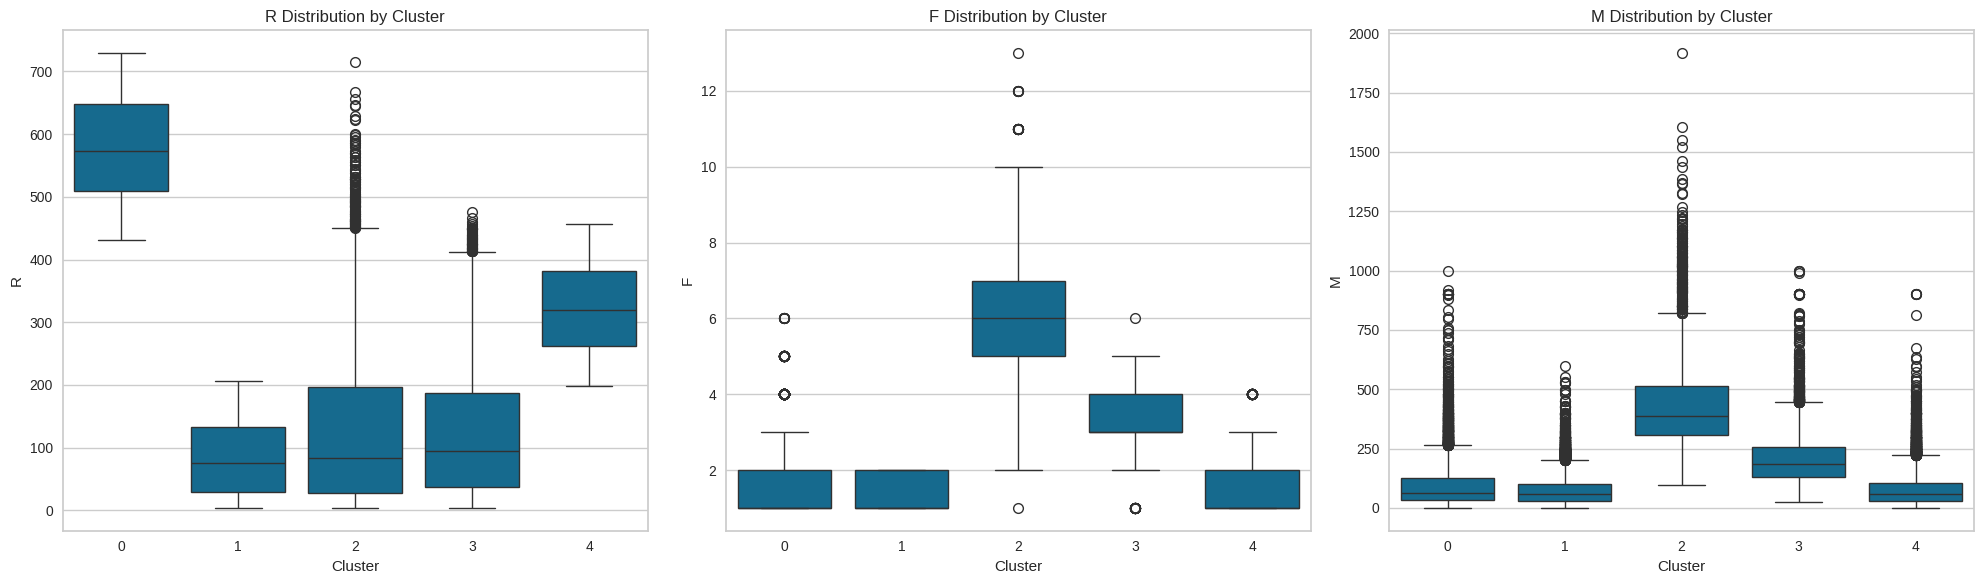

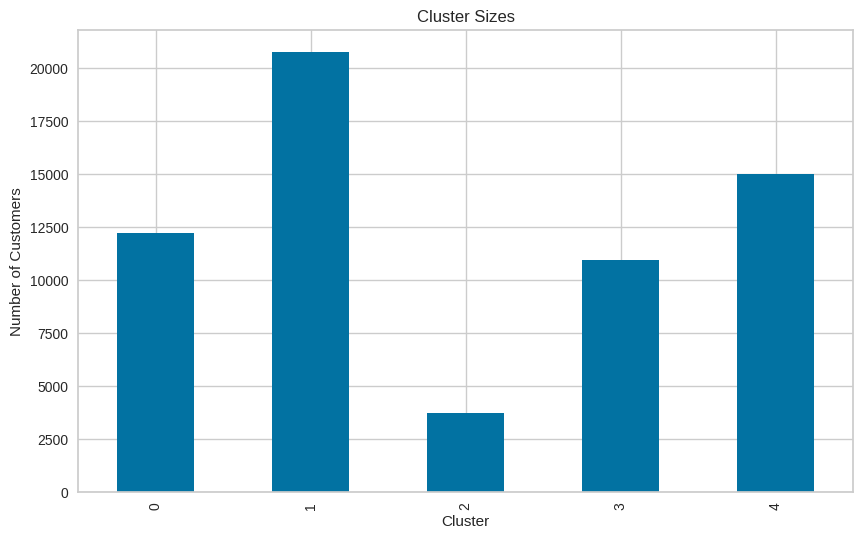

In [251]:
# Visualizations

# Pairplot
sns.pairplot(df_rfm, hue='Cluster', vars=['R','F','M'], plot_kws={'alpha': 0.5})
plt.suptitle('RFM Clusters Pairplot', y=1.02)
plt.show()

# Distribution of RFM values across clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, feature in enumerate(['R', 'F', 'M']):
    sns.boxplot(x='Cluster', y=feature, data=df_rfm, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Cluster')
plt.tight_layout()
plt.show()

# Cluster sizes
plt.figure(figsize=(10, 6))
cluster_sizes = df_rfm['Cluster'].value_counts().sort_index()
cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()